# Problem Statement

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


# Association Rules

It is also known as <b>Association Mining</b> and <b>Market Basket Analysis</b>.

It is majorly used in Supermarkets, but can be used in various fields such as medical, pharmaceutical, research, etc...

<b>Why do we need Assocaition Mining ?</b>

Once we are able to understand the pattern, which products are bought frequently by the customers, which are less sold and which are not bought at all, It becomes much usefull to us from various aspects.

Promotions on one item, raise price of related item,

Placements in the store,

Stocking,  are some examples to mention a few.

The E-commerece websites use this technique to understand people's behaviour. They use that information to give them recommendation, personalized offers, or brithday offers, etc.

They also make use of it to make combo offers, such as while buying a handset, they will offer back cover and screen guard.

It helps the sellers to retain their customers and not lose them.

Their are two terms <b>Antecedent</b> and <b>Consequent</b> used in rules.

Rules are the association of one item to another item

Their are <b>three types of Association rules</b>:-

1. <b>Actionable Rules</b> : Contains high-quality, actionable information.


2. <b>Trival Rules</b> : Information already well-known by those familiar with the business.


3. <b>Inexplicable Rules</b> : No explanation needed and do not suggest action.


<b>Trival and Inexplicable Rules occur most often.</b>

<b>Rule form</b> :-  Antecedent  -->  Consequent

ex. Person who buys Handset also buys Screen Guard ( Handset --> Screen Guard )

We can have many rules and many types of rules ex. A-->B, B-->C, B-->A,C, C,A-->D, C,A-->B,D

<b>There are three majors needed to be defined</b>

1. Support :- (Number of Transaction containing X & Y)/(Total Number of Transaction) 

Let's say we have 0.3 or 30% support, It implies that 30% of the customers who visit your supermarket buy this combination.

2. Confidence :- (Number of Transaction containing X & Y)/(Number of Transaction containing X)

Let's say we have 0.7 or 70% confidence, It implies that, if a customer is buying X then with 75% confidence, we can say that they will buy Y as well.

3. Lift :- (Confidence)/((Number of Transaction containing Y)

It is used to understand why people are buying Y. Is it because it is used with X or is it popular by itself.

The Greater the lift the more credit we give to X for the sales of Y.

<b>Rules Format</b> : "if - then" 

<b>If "Antecedent" Then "Consequent"</b>

For the X --> Y and Y --> X, Support and Lift will be the same but Confidence will be different.

Lift > 1, indicates a rule that is useful in finding consequent itemsets.

Generating frequent itemsets :- <b>The Apriori Algorithm</b>

1. First we decide minimum support criteria, it helps us to filter the rules which we don't need.

2. Generate list of one-item sets that meet the support criteria.

3. Use the list of one-item set to generate list of two-item sets that meet support criteria

4. Use the list of two-item set to generate list of three-item sets that meet support criteria.

And so on till the list ends.

From this Apriori algorithm we make rules

# Importing Libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [6]:
books = pd.read_csv('book.csv')
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Data Exploration

In [7]:
books.size

22000

In [8]:
books.shape

(2000, 11)

In [9]:
books.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [11]:
#Checking Null Values
books.isnull()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False


In [12]:
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

No null values are present.

In [13]:
for i in books.columns:
    print(i, books[i].unique())

ChildBks [0 1]
YouthBks [1 0]
CookBks [0 1]
DoItYBks [1 0]
RefBks [0 1]
ArtBks [0 1]
GeogBks [1 0]
ItalCook [0 1]
ItalAtlas [0 1]
ItalArt [0 1]
Florence [0 1]


In [14]:
for i in books.columns:
    print(i)
    print(books[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



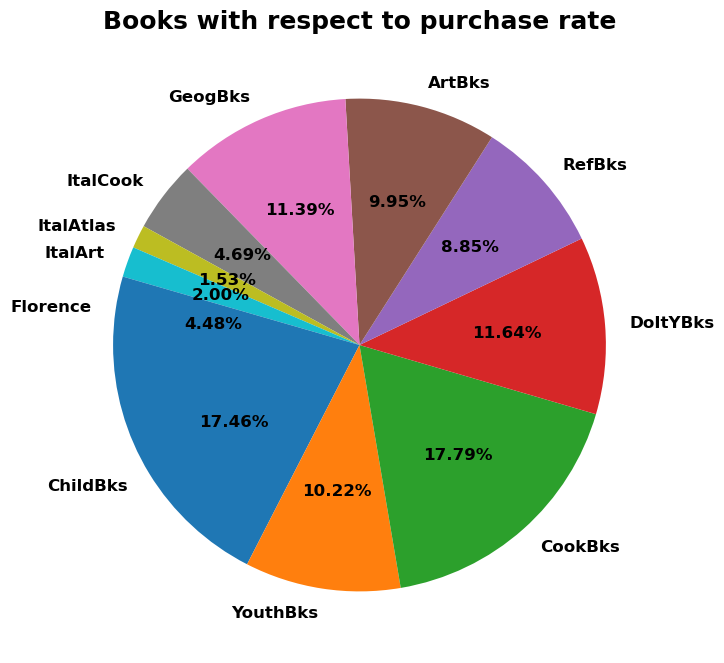

In [15]:
plt.figure(figsize=(10,8))
plt.pie(x=books.sum(),
       labels=books.columns,
       autopct="%.2f%%",
       startangle=180,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Books with respect to purchase rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [16]:
# most popular items
count = books.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [17]:
#Sorting
count.sort_values(0, ascending = False)

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_10268\2440116768.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count.sort_values(0, ascending = False)


CookBks      862
ChildBks     846
DoItYBks     564
GeogBks      552
YouthBks     495
ArtBks       482
RefBks       429
ItalCook     227
Florence     217
ItalArt       97
ItalAtlas     74
dtype: int64

In [18]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_10268\904405685.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count.sort_values(0, ascending = False, inplace=True)


,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


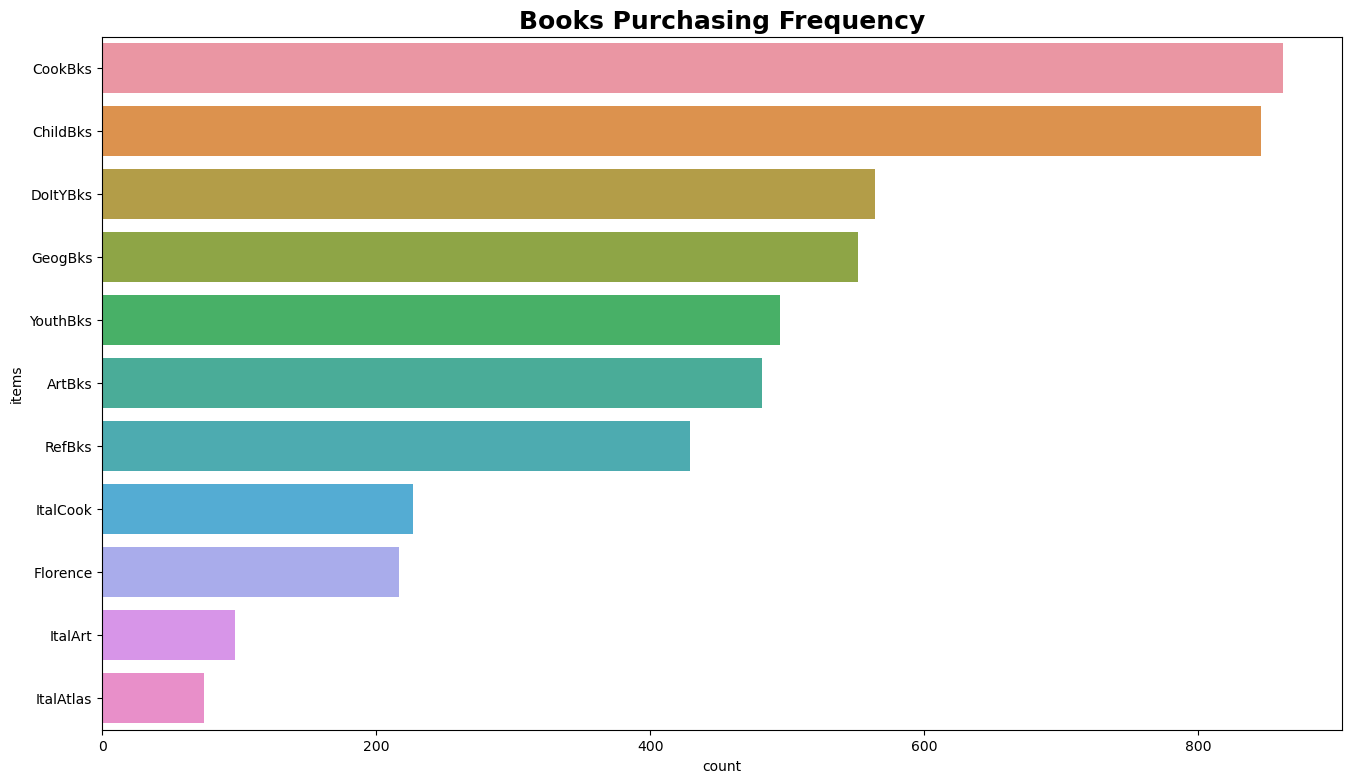

In [19]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x='count', y='items', data = count)
plt.title('Books Purchasing Frequency', fontsize = 18, fontweight = 'bold')
plt.show()

# Most Frequently bought books are : CookBks and ChildBks	

There is no need for Data Preprocessing as we already have it in the Transaction Format.

# Apriori Algorithm

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

In [42]:
#The Question says "Try different values of support and confidence. Observe the change in number of rules for different support,
#confidence values"
#Lets try out 
# 1. support 10% and confidence 80%
# 2. support 20% and confidence 50%
# 1. support 5% and confidence 30%

#  1. Support 10% and confidence 80%

In [43]:
data = books.copy()
frequent_itemsets1 = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets1

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [44]:
#Rules

rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
4,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


There are only 5 frequent itemsets with 80% confidence

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

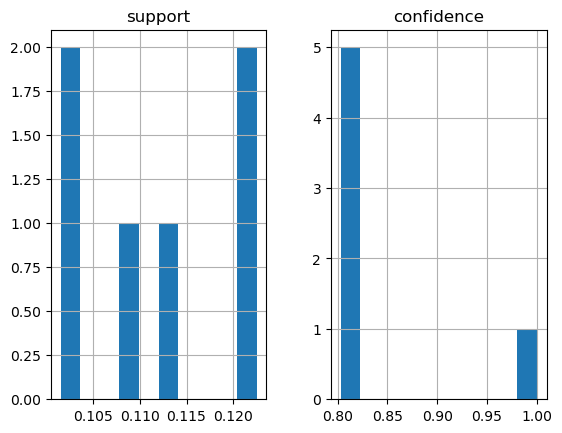

In [45]:
#vizualiztion of the obtained rules

rules1[['support','confidence']].hist()

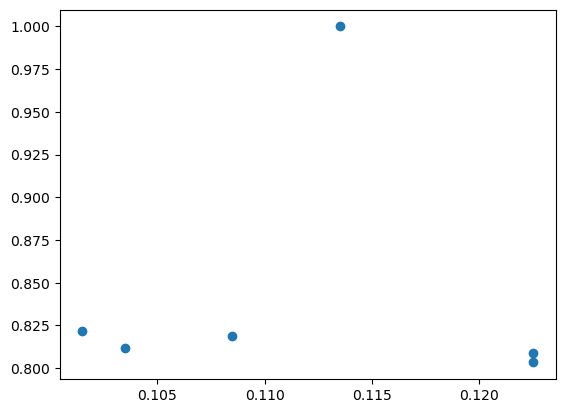

In [46]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

In [47]:
#lets try with 0.8 lift
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [48]:
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [49]:
#Lift>1 indicates a rule, that is useful in finding consequent itemsets
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

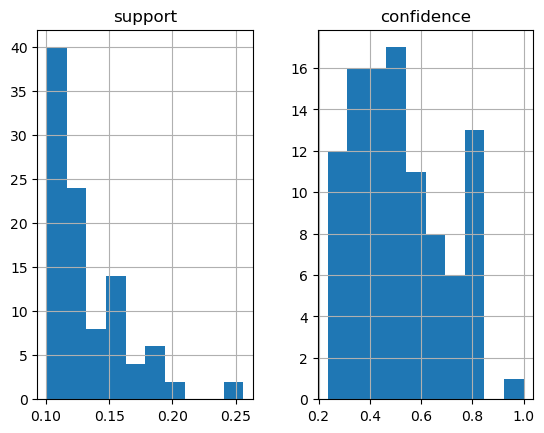

In [50]:
#vizualiztion of the obtained rules

rules1[['support','confidence']].hist()

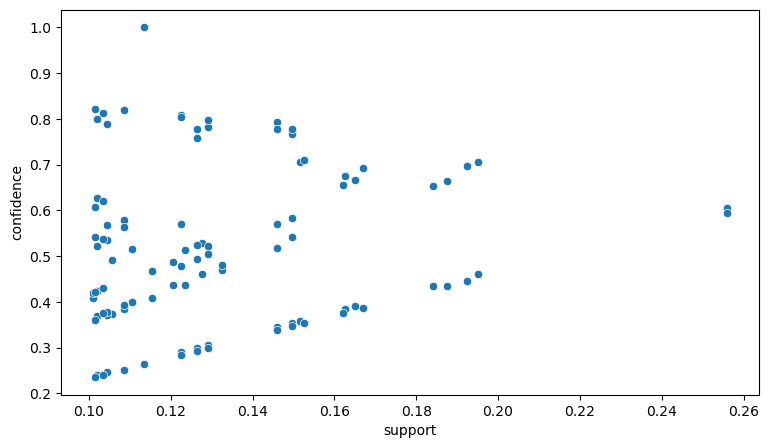

In [66]:
fig=plt.figure(figsize=(9,5))
sns.scatterplot(x= rules1['support'], y=rules1['confidence'])
plt.show()

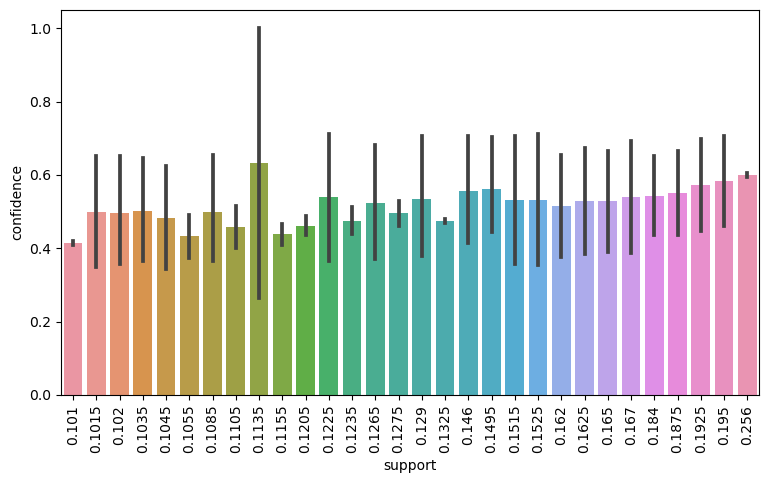

In [71]:
fig=plt.figure(figsize=(9,5))
sns.barplot(x= rules1['support'], y=rules1['confidence'])
plt.xticks(rotation =90)
plt.show()

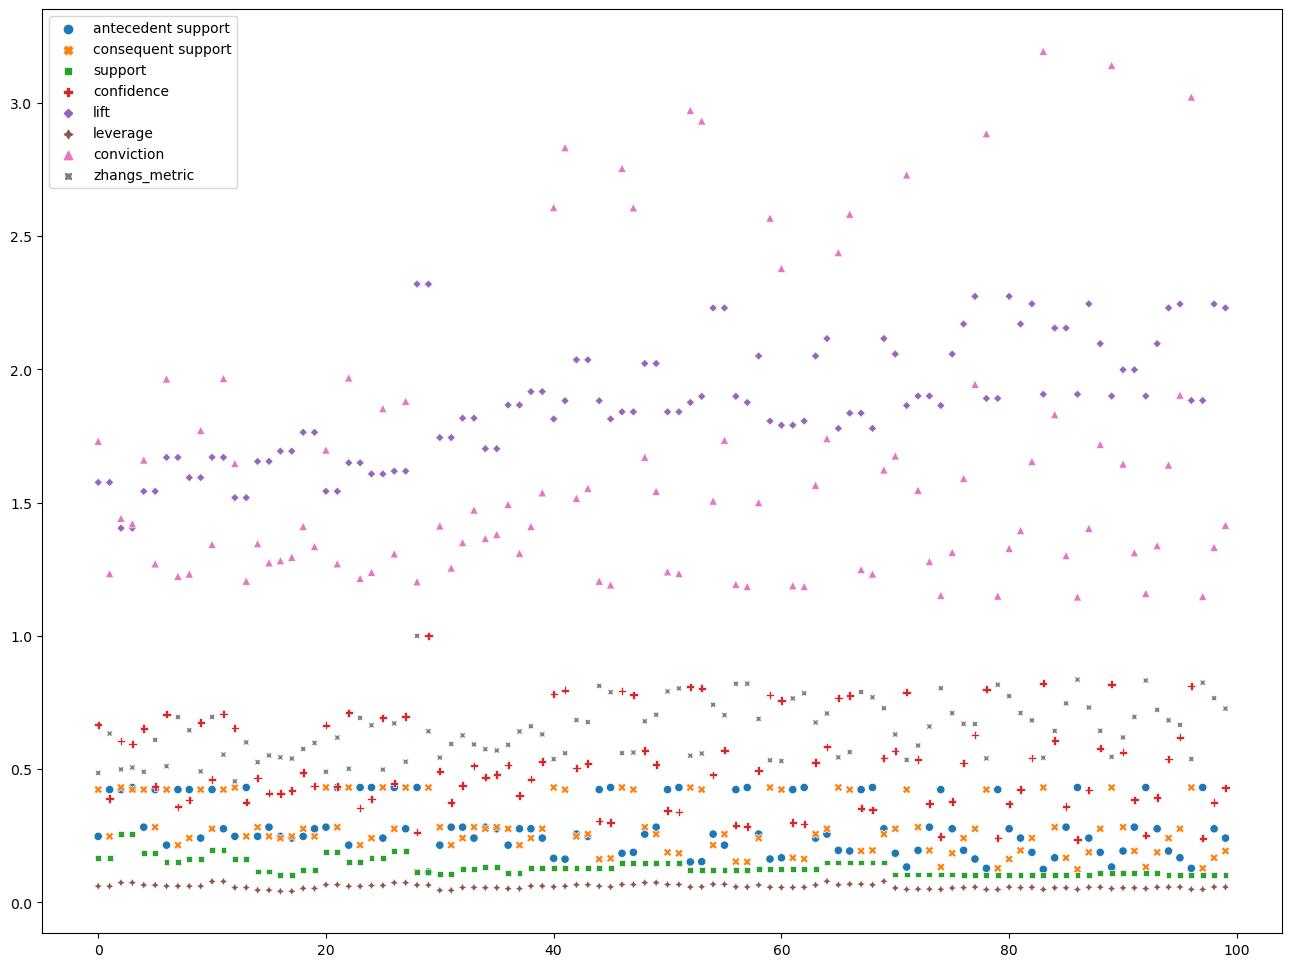

In [61]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=rules1)
plt.show()

# 2. support 20% and confidence 50%

In [52]:
frequent_itemsets2 = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets2

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


With minimum support of 20% there are only 7 frequent itemsets

In [53]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

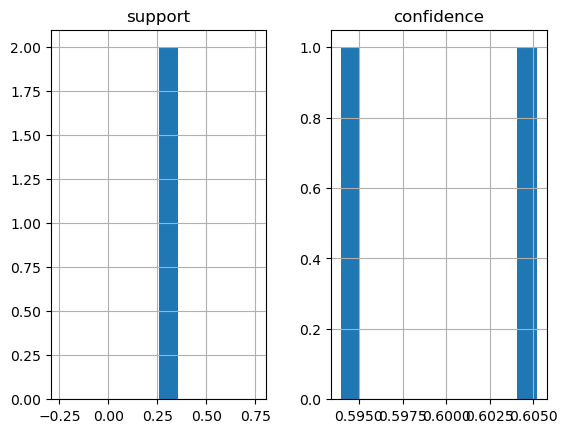

In [54]:
#vizualiztion of the obtained rules

rules2[['support','confidence']].hist()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


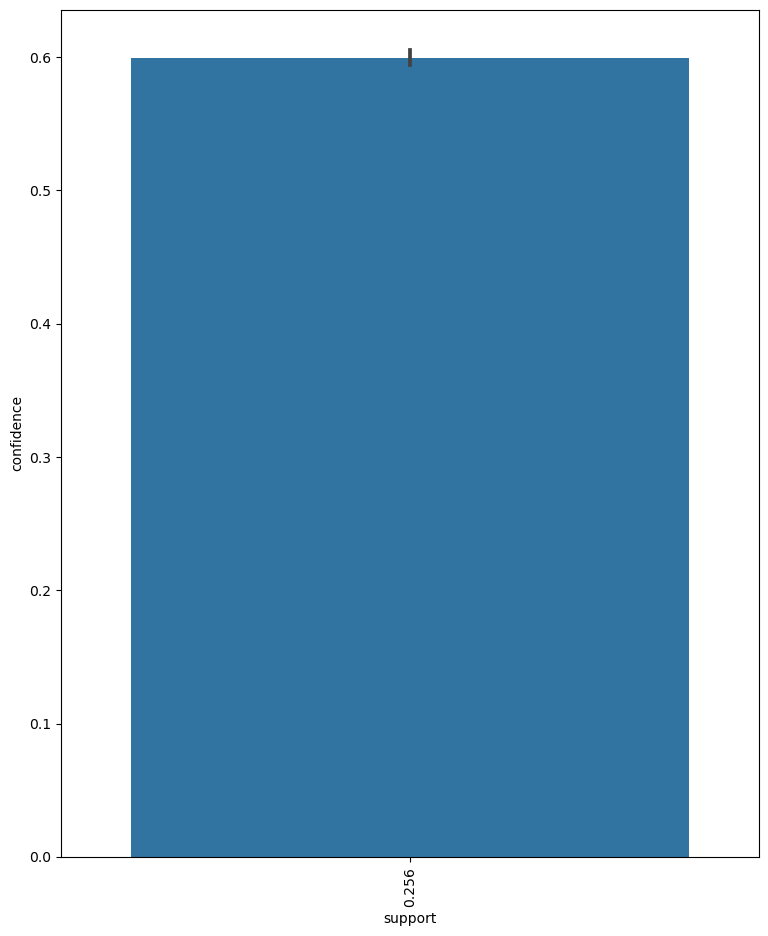

In [73]:
fig = plt.figure(figsize=(9,11))
sns.barplot(rules2['support'], rules2['confidence'])
plt.xticks(rotation = 90)
plt.show()

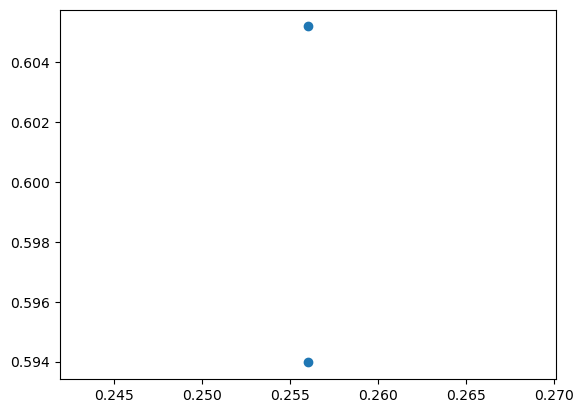

In [55]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

<AxesSubplot:>

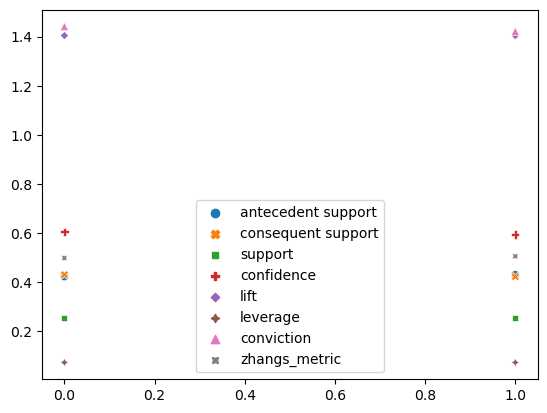

In [74]:
sns.scatterplot(data=rules2)

There are only 2 rules formed in this setting.

# Support 5% and Confidence 30%

In [56]:
frequent_itemsets3 = apriori(data, min_support=0.05, use_colnames=True)
frequent_itemsets3

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, CookBks, GeogBks)"
96,0.0560,"(YouthBks, CookBks, GeogBks, ArtBks)"
97,0.0650,"(DoItYBks, CookBks, GeogBks, ArtBks)"
98,0.0510,"(DoItYBks, ChildBks, CookBks, GeogBks, YouthBks)"


In [57]:
rules3 = association_rules(frequent_itemsets3, metric='confidence', min_threshold=0.3)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
473,"(DoItYBks, ArtBks)","(ChildBks, CookBks, GeogBks)",0.1235,0.1495,0.0535,0.433198,2.897648,0.035037,1.500525,0.747168
474,"(DoItYBks, GeogBks)","(ChildBks, CookBks, ArtBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047,0.791591
475,"(ChildBks, ArtBks)","(DoItYBks, CookBks, GeogBks)",0.1625,0.1085,0.0535,0.329231,3.034385,0.035869,1.329071,0.800530
476,"(CookBks, ArtBks)","(DoItYBks, ChildBks, GeogBks)",0.1670,0.1045,0.0535,0.320359,3.065639,0.036048,1.317608,0.808888


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

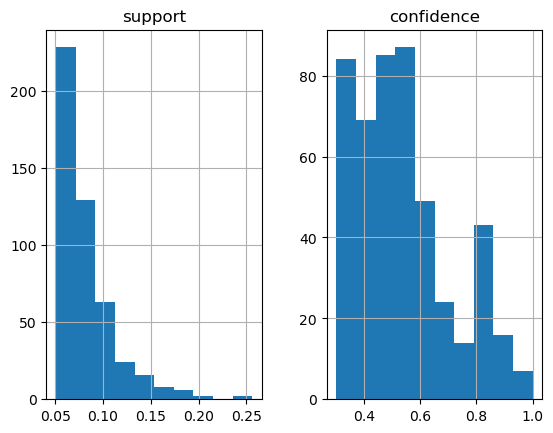

In [58]:
#vizualiztion of the obtained rules
#fig = plt.figure(figsize=(19,12))
rules3[['support','confidence']].hist()

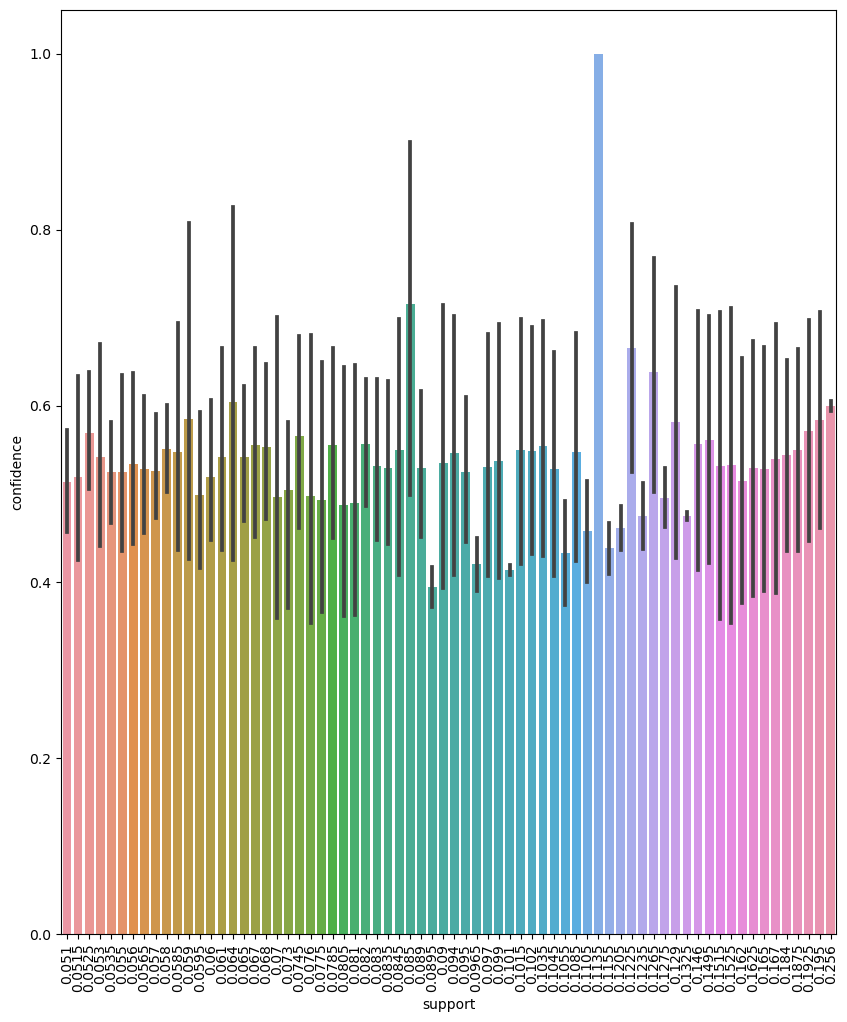

In [75]:
fig = plt.figure(figsize= (10,12))
sns.barplot(x=rules3['support'],y=rules3['confidence'])
plt.xticks(rotation = 90)
plt.show()

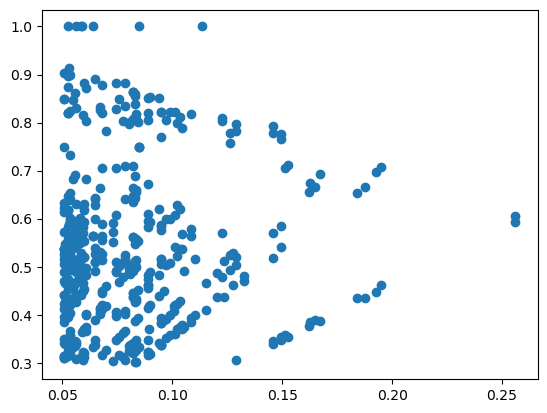

In [59]:
#fig = plt.figure(figsize=(19,12))
plt.scatter(rules3['support'],rules3['confidence'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


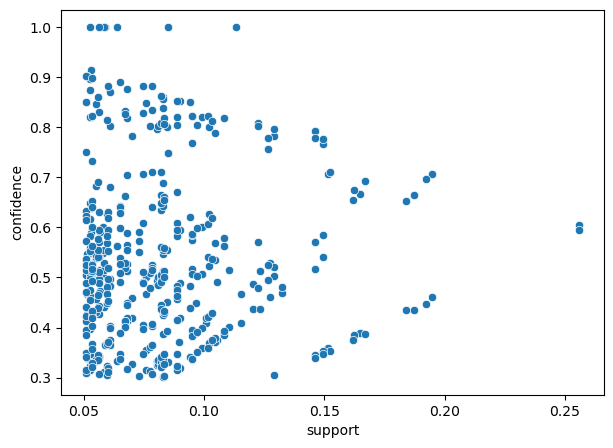

In [78]:
fig = plt.figure(figsize=(7,5))
sns.scatterplot(rules3['support'], rules3['confidence'])
plt.show()

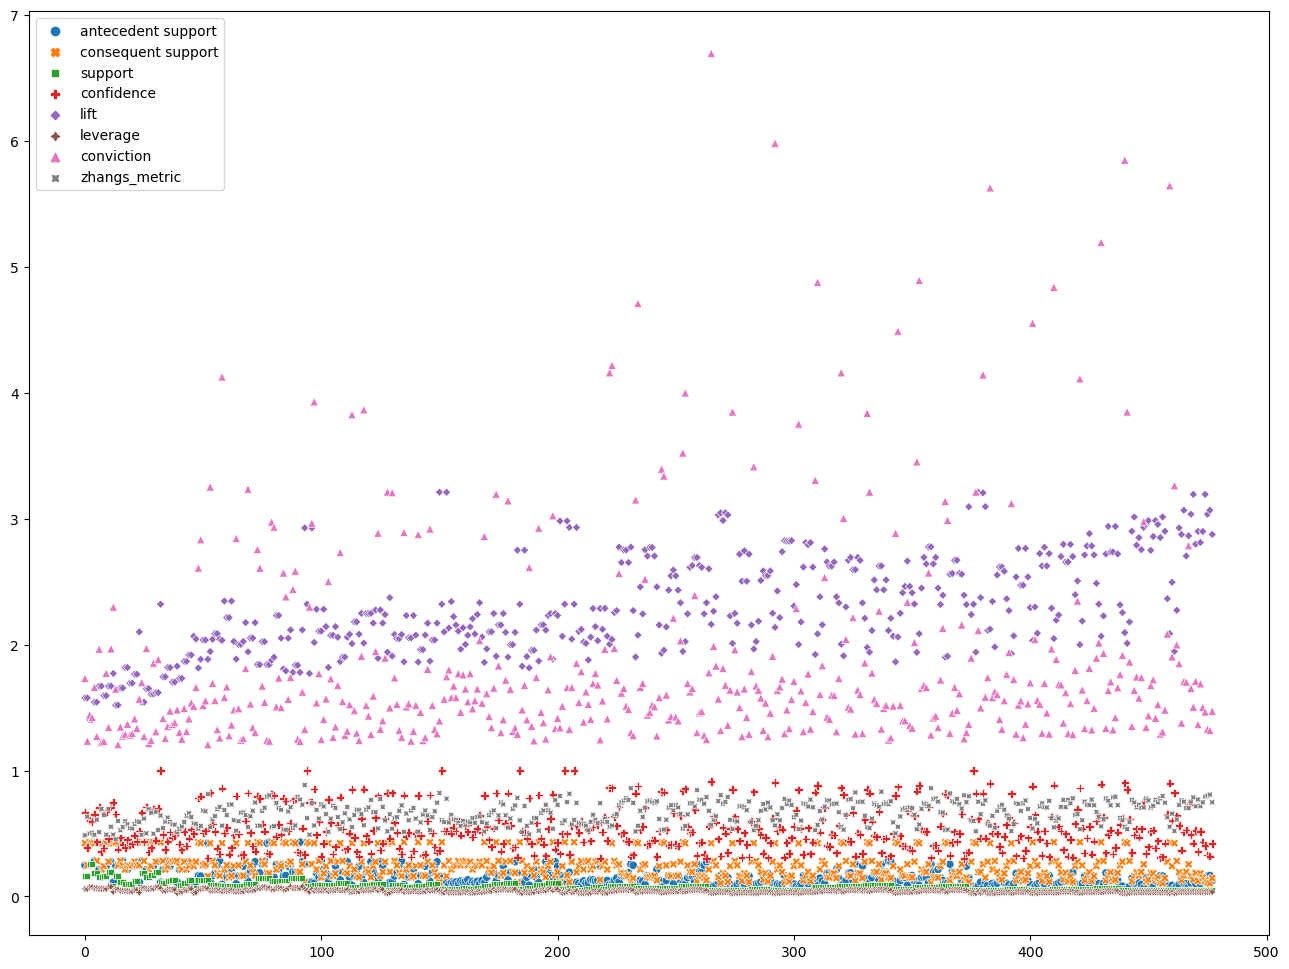

In [60]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=rules3)
plt.show()